[['1107557', 'CARD T', 'BSI', 'LCBI', 'BSI', 'LCBI', '', '', '', '', '', '', 'Cirurgia cardíaca - troca de válvula ', 'Cirurgia cardíaca', 'Cirurgia Cardíaca', 'B', '2', 'Não', '43', 'Não', '3', 'Não', '', '', 'Potencialmente Contaminada', 'Não', 'A_Sim', 'A_Sim', 'Nâo', '2', 'Não', 'A_Sim', 'A_Sim', 'Não', '0', '2', 'A_Sim', '4', 'Não', 'A_Sim', 'Não', 'A_Sim', 'Não', 'Não', '', ''], ['683562', 'CARD-T', 'BSI', 'LCBI', 'SSI', 'MED', '', '', '', '', '', '', 'Cirurgia cardíaca - troca de válvula ', 'Cirurgia cardíaca', 'Cirurgia Cardíaca', 'C', '2', 'Não', '74', 'A_Sim', '5', 'A_Sim', '', '', 'Limpa', 'A_Sim', '', '', '', '2', 'Não', '', '', 'Não', '', '1', 'Não', '2', 'Não', 'A_Sim', 'A_Sim', 'A_Sim', 'Não', 'Não', '', ''], ['833905', 'CARD-T', 'BSI', 'LCBI', 'BSI', 'LCBI', '', '', '', '', '', '', 'Cirurgia cardíaca - troca de válvula ', 'Cirurgia cardíaca', 'Cirurgia Cardíaca', 'C', '1', 'A_Sim', '70', 'Não', '2', 'Não', '', '', 'Limpa', 'A_Sim', '', '', '', '3', 'A_Sim', 'A_Sim', '',

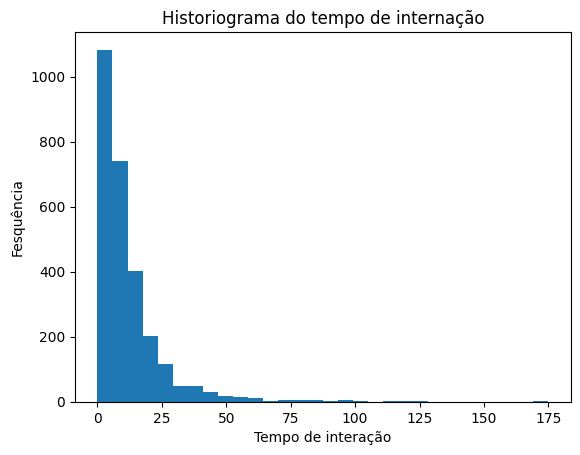

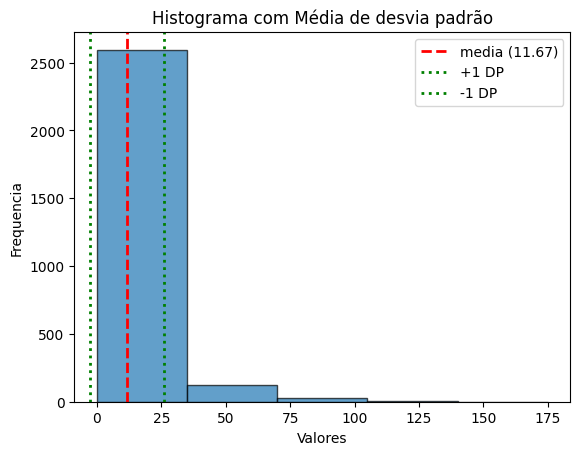



Objetivo: Descubra qual é a coluna de idade e refaça os cálculos:


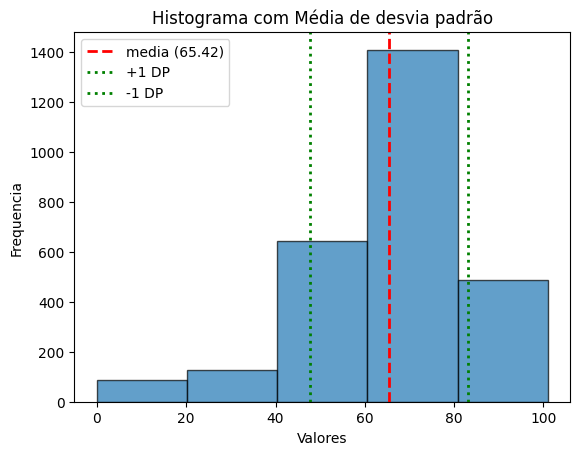


Análise da coluna Tempo de Interação
Média: 11.671875
Desvio padrão: 14.396835943293826


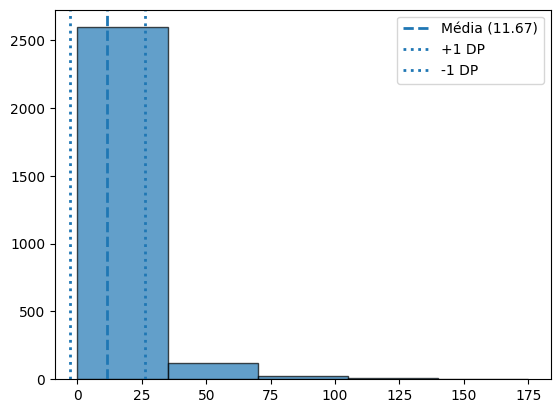


Análise da coluna Idade
Média: 65.42042151162791
Desvio padrão: 17.76897025723667


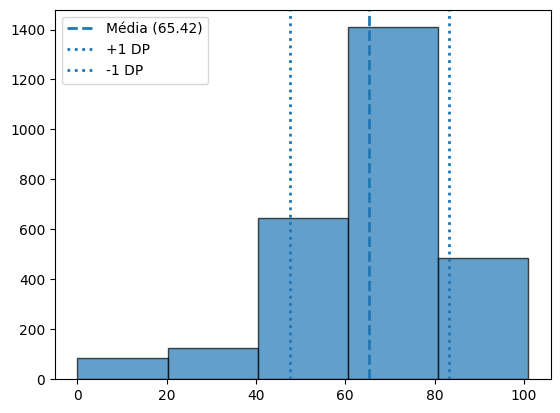

In [38]:
from matplotlib.lines import lineStyles
import csv
import numpy as np
import statistics
import matplotlib.pyplot as plt

#"with open" garante que o arquivo será fechado automaticamente
with open("nao-tratada.csv", "r", newline="", encoding="utf-8") as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    matriz_lista_de_listas = list(leitor_csv)#Converte toda as linhas em uma lista
#Se quiser remover o cabeçalho (Primeira Linha)
#matriz_lista_de_listas = list(leitor_csv)[1:] #Ignora a primeira linha

print(matriz_lista_de_listas[1:])#Imprima a linha 1
matriz_lista_de_listas.pop(0)#Remove a linha 0
print(matriz_lista_de_listas)

print("####################")
#Agora vamos abrir de outra forma (usar a base TRATADA)
print("Agora vamos abrir de outra forma (usar a base TRATADA)")

with open("tratada.csv", "r", newline="", encoding="utf-8") as arquivo_tratado_csv:
    leitor_tratado_csv = csv.reader(arquivo_tratado_csv)
    matriz_tratada_lista_de_listas = list(leitor_tratado_csv)
print(matriz_tratada_lista_de_listas[1:])

print("####################")
print("Essa base tratada, vamos inserir a mesma em uma matriz para cálculos")
#delimiter="," indica que os valores são separados por vírgula
#skipRows= 1 ignora o cabeçalho, se houver
matriz_numpy = np.loadtxt("tratada.csv", delimiter=",", skiprows=1)

print(matriz_numpy)
print("Tamanho da base")
print(matriz_numpy.shape)
print("Linha 1 - colunas de 3 a 10")
print(matriz_numpy[1:, 15:18])
print(matriz_numpy[1,16])
print(f"Teste aqui {matriz_numpy[:3]}")
print(matriz_numpy[:, 2])

print("####################")
print("Agora vamos colocar contas nesse negócio!")

def analisar_coluna(coluna, nome):
    media = np.mean(coluna)
    desvio = np.std(coluna, ddof=1)

    print(f"\nAnálise da coluna {nome}")
    print(f"Média: {media}")
    print(f"Desvio padrão: {desvio}")

    plt.hist(coluna, bins=5, edgecolor="black", alpha=0.7)
    plt.axvline(media, linestyle="--", linewidth=2, label=f"Média ({media:.2f})")
    plt.axvline(media + desvio, linestyle=":", linewidth=2, label="+1 DP")
    plt.axvline(media - desvio, linestyle=":", linewidth=2, label="-1 DP")
    plt.legend()
    plt.show()

media = statistics.mean(matriz_numpy[0:,16])
print(f"Esse é a média do tempo de interação - base tratada: {media}\n")

desvio = statistics.stdev(matriz_numpy[:,16])
print(f"Esse é o desvio padrão do tempo de interação - base tratada: {desvio}\n")

variancia=statistics.variance(matriz_numpy[:,16])
print(f"Esse é a variancia do tempo de interação - base tratada:  {variancia}\n")

moda=statistics.mode(matriz_numpy[:,16])
print(f"Esse é a moda do tempo de interação - base tratada:  {moda}\n")

mediana=statistics.median(matriz_numpy[:,16])
print(f"Esse é a mediana do tempo de interação - base tratada:  {mediana}\n")
plt.hist(matriz_numpy[:,16], bins=30)
plt.xlabel("Tempo de interação")
plt.ylabel("Fesquência")
plt.title("Historiograma do tempo de internação")
plt.show()

plt.hist(matriz_numpy[:,16], bins=5, edgecolor="black", alpha=0.7)
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"media ({media:.2f})")
plt.axvline(media + desvio, color="green", linestyle=':', linewidth=2, label=f"+1 DP")
plt.axvline(media - desvio, color="green", linestyle=':', linewidth=2, label=f"-1 DP")
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Histograma com Média de desvia padrão")
plt.legend()
plt.show()

print("\n")
print("Objetivo: Descubra qual é a coluna de idade e refaça os cálculos:")
mediaIdade = statistics.mean(matriz_numpy[0:,2])
desvioIdade = statistics.stdev(matriz_numpy[:,2])
plt.hist(matriz_numpy[:,2], bins=5, edgecolor="black", alpha=0.7)
plt.axvline(mediaIdade, color="red", linestyle="--", linewidth=2, label=f"media ({mediaIdade:.2f})")
plt.axvline(mediaIdade + desvioIdade, color="green", linestyle=':', linewidth=2, label=f"+1 DP")
plt.axvline(mediaIdade - desvioIdade, color="green", linestyle=':', linewidth=2, label=f"-1 DP")
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Histograma com Média de desvia padrão")
plt.legend()
plt.show()

analisar_coluna(matriz_numpy[:,16], "Tempo de Interação")
analisar_coluna(matriz_numpy[:,2], "Idade")


